DATA NORMALIZATION
- it is the process of transforming your data by scaling each feature in a given dataset to a particular range, usually from 0-1

###NOTES  
- Data normalization or feature scaling is not always required
** Should only be USED WHEN APPLYING any machine learning and statistical model like KNN's, Linear Regression etc to the process data then apply data normalization beforehand
** But for Naive's Bayes, Decision Trees etc. , IT IS NOT REQUIRED TO USE Data Normalization. Because it does not use any distance metric. What it means is that, its not like you will get any error if you use it prior to applying it to this model, but you it wont make any difference to the final result.

- Techniques to use depends on use case. Unlike simple feature scaling and min-max scaling, the Z SCORE technique deals with outliers in a much better way


In [ ]:
import pandas as pd

In [7]:
# how to read the data if using google collab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (3).csv


In [8]:
# reading in the datasets under jupiter
# I used the semicolon as a separator or delimmiter
wine_data = pd.read_csv("winequality-red.csv", sep=";")

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Simple feature Scaling
- Dividing the value I want to normalize with the maximum value for the particular feature

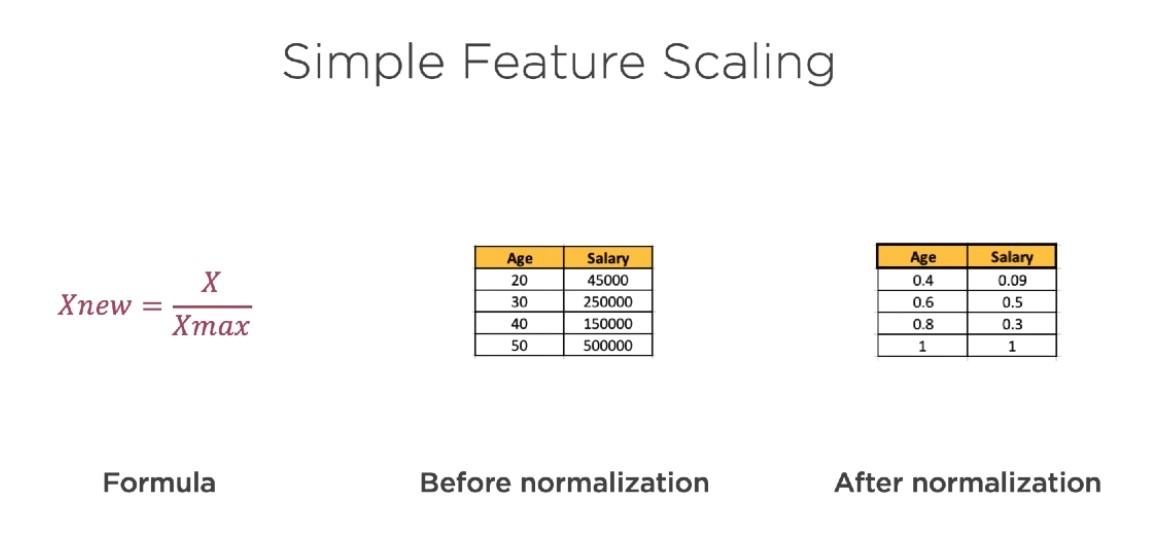

In [10]:
# feature by feature
# The fixed acidity data has changed.
wine_data["fixed acidity"] = wine_data["fixed acidity"] / wine_data["fixed acidity"].max()
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.490566,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.490566,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.704403,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.465409,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# applying to the entire dataset
wine_data = wine_data/wine_data.max()
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,0.625
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,0.625
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,0.750
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625


### Min-Max Scaling
- subtracting the lowest value in the feature from the value that I want to normalize

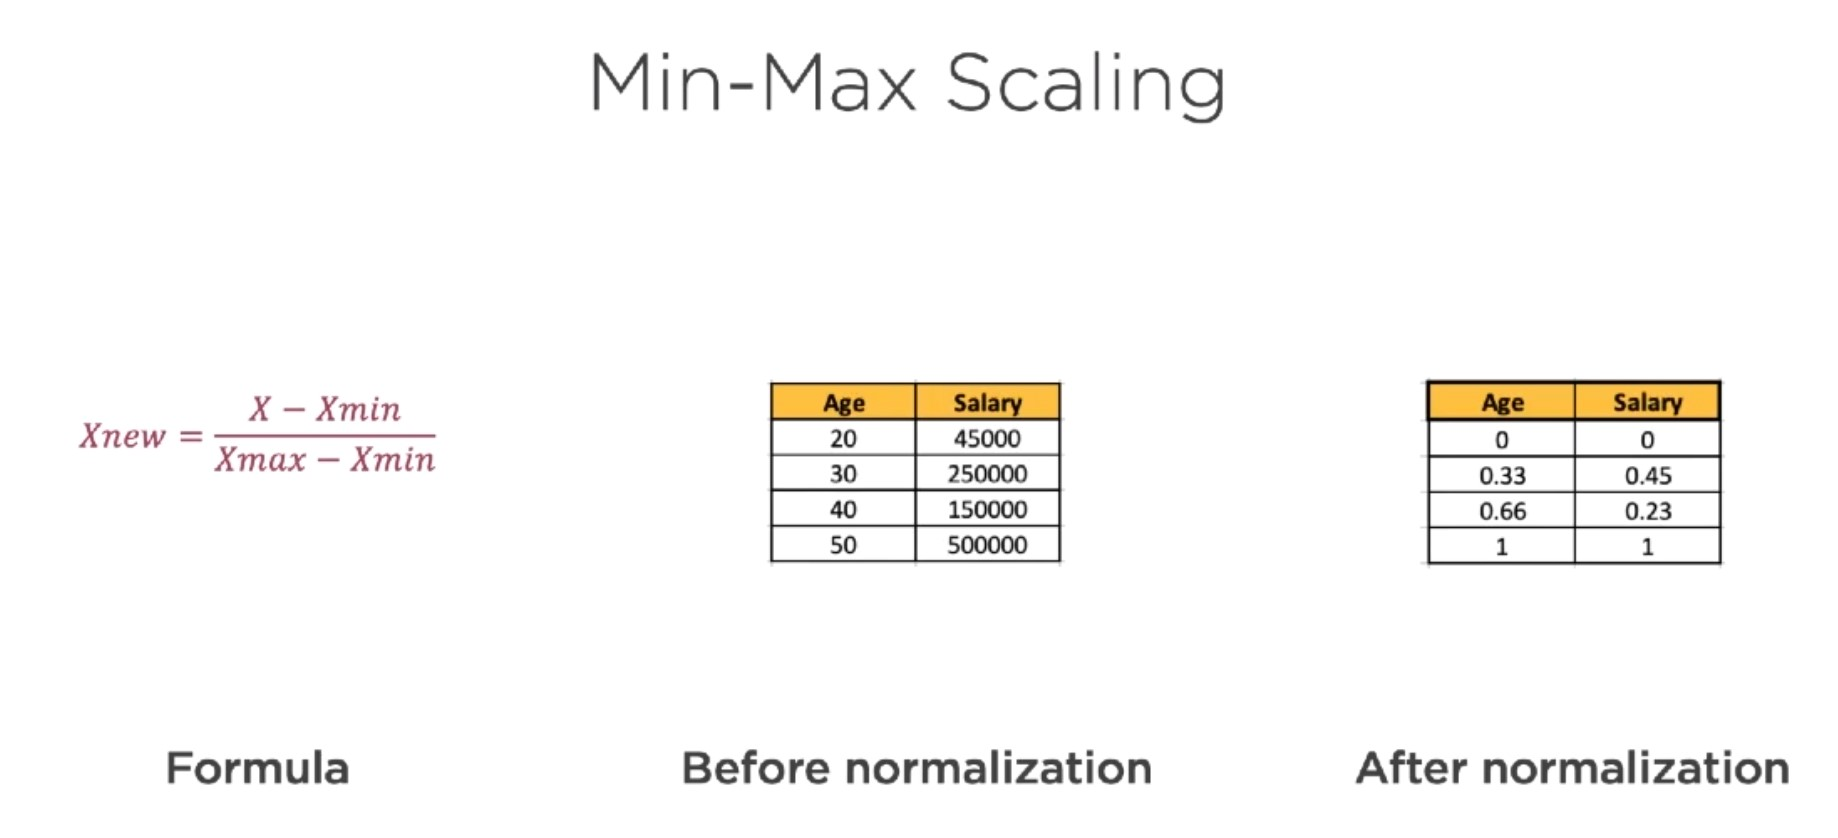

In [12]:
# single feature manual

wine_data["fixed acidity"] = (wine_data["fixed acidity"] - wine_data["fixed acidity"].min()) / \
                             (wine_data["fixed acidity"].max() - wine_data["fixed acidity"].min())

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
1,0.283186,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,0.625
2,0.283186,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,0.625
3,0.584071,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,0.750
4,0.247788,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625


In [14]:
# using sklearn

from sklearn.preprocessing import MinMaxScaler  # importing the MinMaxScaler using sklearn

scaler = MinMaxScaler()  #this is for creating instance

wine_data[wine_data.columns] = scaler.fit_transform(wine_data[wine_data.columns]) #to select all the columns in the dataset

In [15]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Z-Score Normalization or STANDARD SCORE
- This is a number of standard deviations from the man a given data point.
- Technically, it is a measure of how many standard deviations below or above the population mean a value is
- Z-scores range from -3 to 3 standard deviations
- To use z-scores I would need the mean, mu and also the population standard deviation, sigma

###NOTES
- if a value is exactly equal to the man of all the values of the feature, it will be normalized to zero.
- if it is below the mean then it will be a negative number.
-it is above the mean, it will be a positive number
- the size of the those negative and positive numbers are determined by the standard deviation of the original feature.
- can be coded through manual way and can also be coded through scikit learn



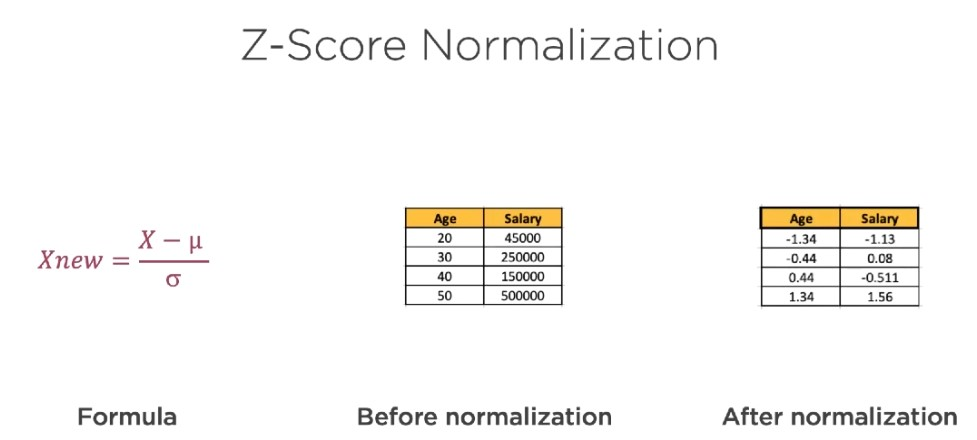

In [16]:
# single feature manual

wine_data["fixed acidity"] = (wine_data["fixed acidity"] - wine_data["fixed acidity"].mean()) / \
                             (wine_data["fixed acidity"].std())
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,-0.298454,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,-0.298454,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,1.654339,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,-0.528194,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [17]:
# using sklearn

from sklearn.preprocessing import StandardScaler # importing StandardScaler

scaler = StandardScaler() # creating instance

wine_data[wine_data.columns] = scaler.fit_transform(wine_data[wine_data.columns]) #using the fit_transform to get the data

In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


### NOTES2
- The Z-score technique is a method of detecting and removing outliers from a dataset. It measures the number of standard deviations away an observation is from the mean value.

- If the z-score of a data point is more than 3, it indicates that the data point is quite different from the other data points and can be considered an outlier.

- This method is highly efficient in detecting and removing outliers, but it only works with data that is completely or close to normally distributed. It is not suitable for skewed data, either left skew or right skew. Unlike simple feature scaling and min-max scaling, which do not take into account the distribution of the data, the Z-score technique deals with outliers in a much better way by taking into account the distribution of the data and identifying observations that are significantly different from the mean. This allows for more accurate identification and removal of outliers, leading to improved model accuracy